In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fish-market/Fish.csv


In [47]:
data = pd.read_csv('/kaggle/input/fish-market/Fish.csv')

Today I'm trying to predict the type of species using Logistic Regression . IT worked out pretty well


First let use see if the dataset requires any cleaning

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There are no null values in the data set . So now we can get into prediction process

Let us see how many species are there in the dataset

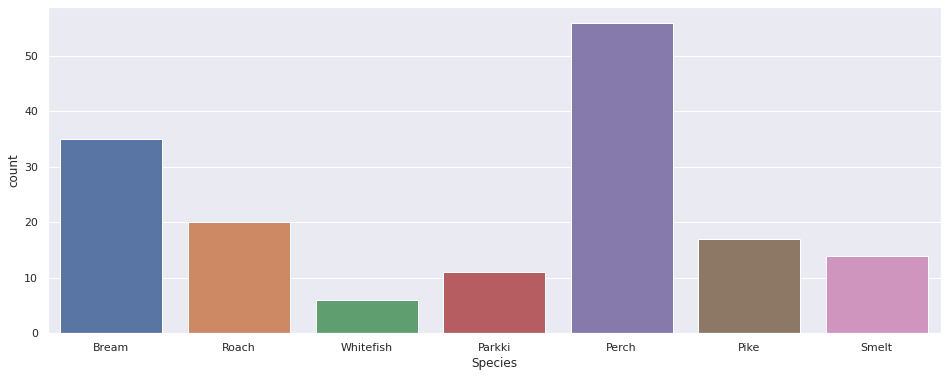

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="Species", data=data)

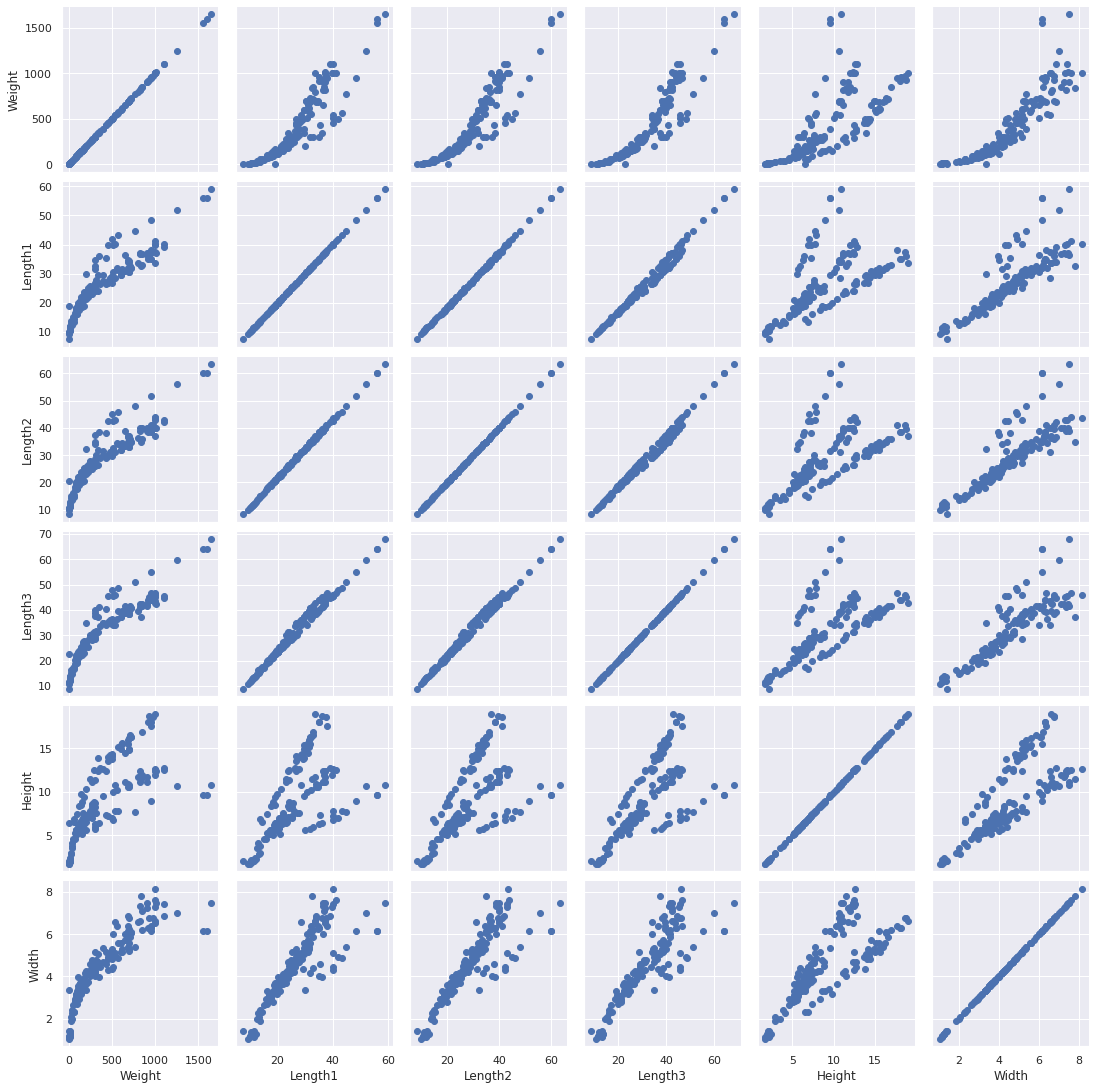

In [17]:
x= sns.PairGrid(data)
x = x.map(plt.scatter)

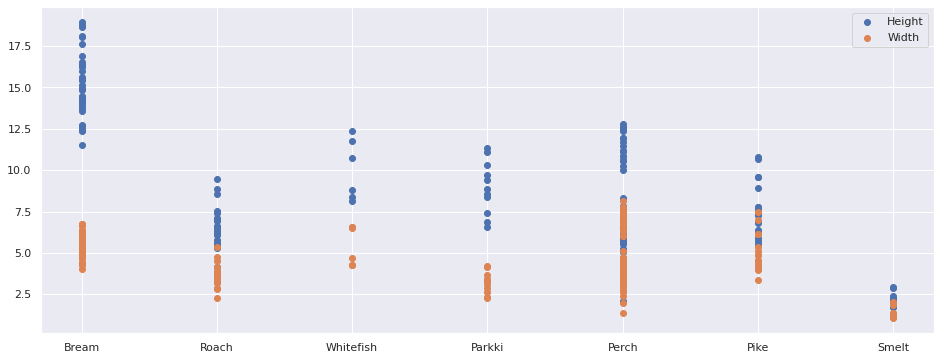

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [39]:
X = data['Species']
y=data['Height']
z=data['Width']

plt.figure(figsize=(16, 6))

plt.scatter(X,y,label='Height')
plt.scatter(X,z,label = 'Width')
plt.legend()
plt.show()
data.Species.unique()

I will be using Logistic Regresion for this problem

In [48]:
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Species'])
y = data.Species

Split the data by test size of 20 percent . I tried different sizes of the test and train size . It seems like 20 percent is the best fit

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()

Train the model 

In [ ]:
model.fit(X_train,y_train)

Now lets predict the value

In [ ]:
model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

We got 87 percent accuracy which is perfectly amazing . 

The reason i used LOgistics regression is it works well with labels and small taining sets